In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [20]:
import pandas as pd
import dfply as df
import pingouin as pg
import seaborn as sns
import scipy.stats

In [23]:
def annotate(data, x, y, **kws):
    r, p = scipy.stats.spearmanr(data[x], data[y])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.7f}'.format(r, p),
            transform=ax.transAxes, fontsize=14)

In [73]:
spearmanr_sym = df.make_symbolic(scipy.stats.spearmanr)

In [3]:
data = pd.read_csv('./data_tif.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'Subject', 'Trial', 'Song', 'Entropy', 'Familiarity',
       'Enjoyment', 'Artist', 'Length', 'Popularity', 'Explicit',
       'Acousticness', 'Danceability', 'Energy', 'Liveness', 'Loudness', 'Key',
       'Mode', 'Speachiness', 'Instrumentalness', 'Tempo', 'Time signature',
       'Happiness', 'Subjects', 'Area', 'Electrode', 'Mean_alpha', 'Std_alpha',
       'Time_over_std', 'Event_density', 'Pulse_clarity', 'Zero_cross',
       'Rolloff', 'Brightness', 'Regularity', 'Mir_entropy', 'Age', 'Training',
       'Listening'],
      dtype='object')

### Correlaciones por area

In [37]:
data_per_area = (
    data
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Std_alpha', 'Mean_alpha', 'Pulse_clarity', 'Training'])
    >> df.group_by('Song', 'Subject', 'Area', 'Type')
    >> df.summarize(Value=df.X.Value.mean())
    >> df.spread('Type', 'Value')
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Pulse_clarity', 'Training'])
)
data_totals = (
    data
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Std_alpha', 'Mean_alpha', 'Pulse_clarity', 'Training'])
    >> df.group_by('Song', 'Subject', 'Type')
    >> df.summarize(Value=df.X.Value.mean())
    >> df.spread('Type', 'Value')
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Pulse_clarity', 'Training'])
    >> df.mutate(Area='all')
)
data_grouped = pd.concat([data_per_area, data_totals])

/Users/march/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


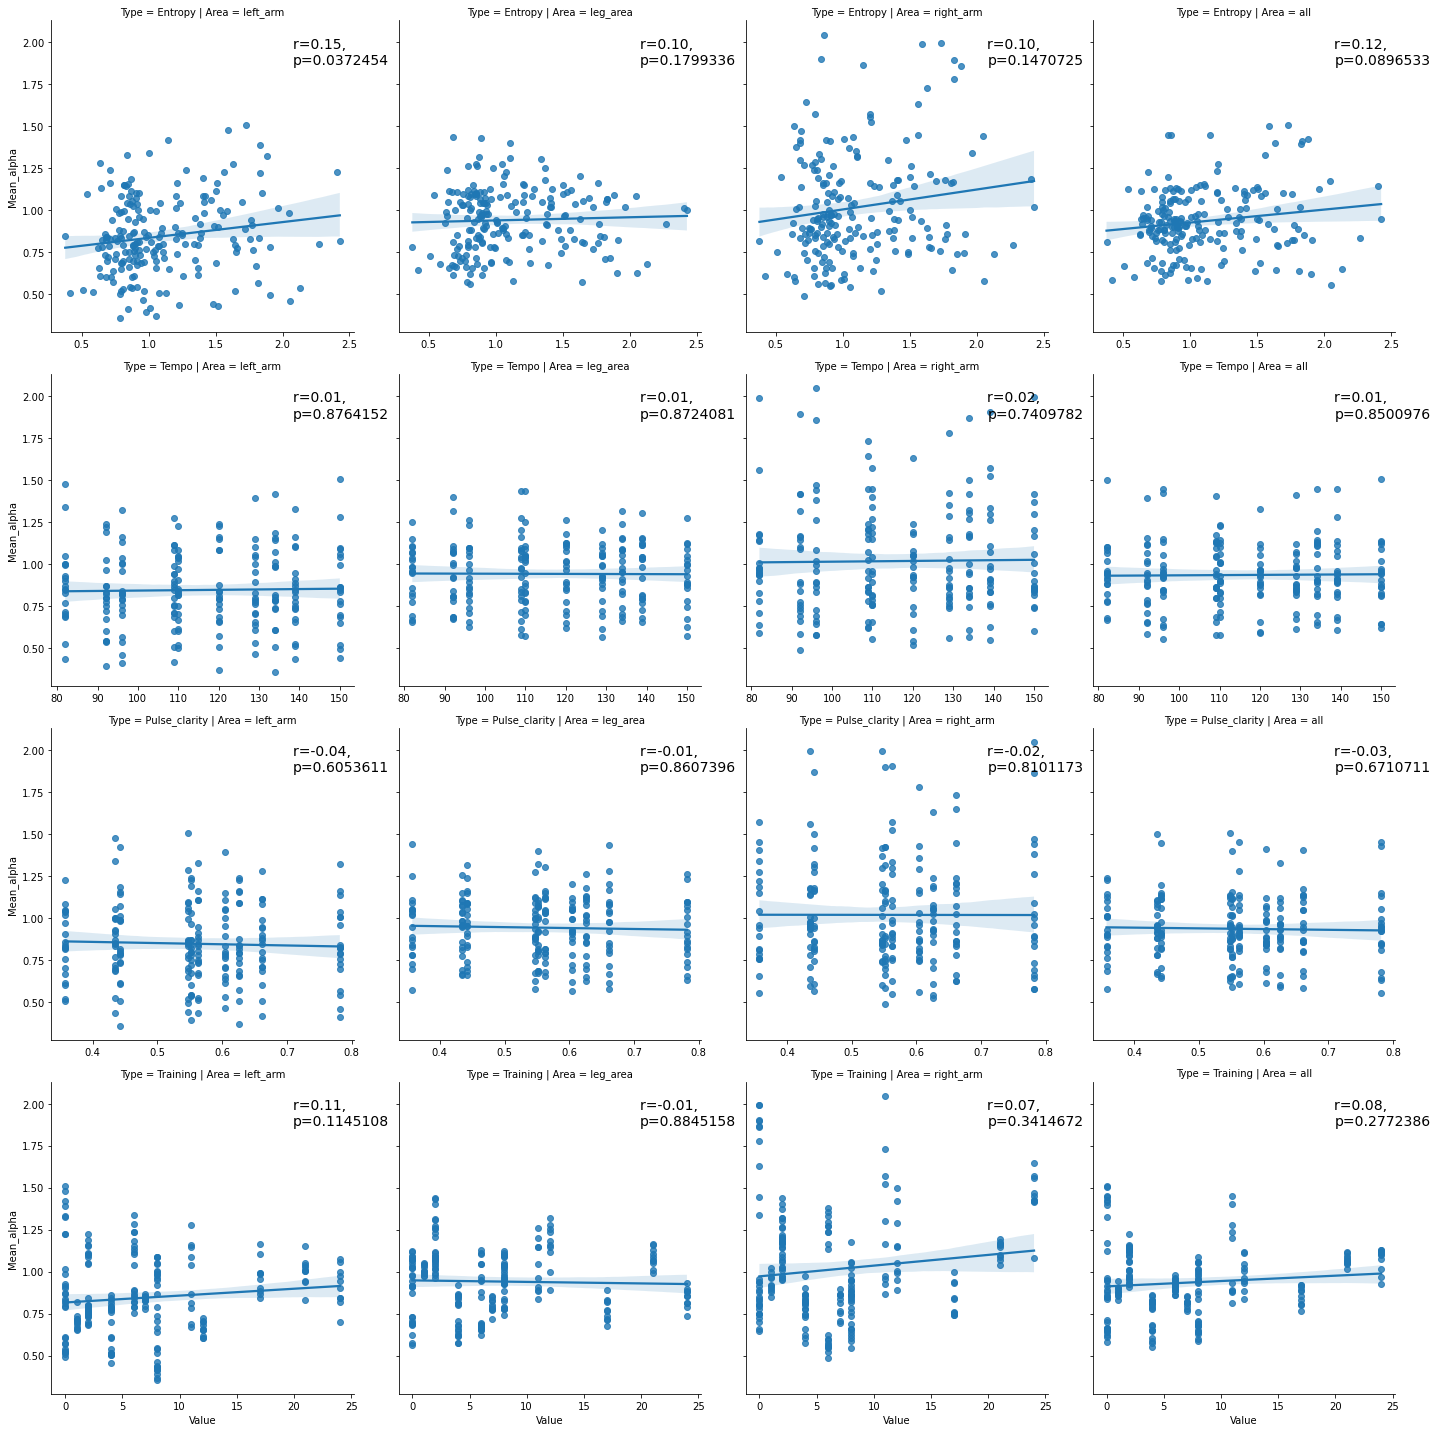

In [38]:
g = sns.lmplot(data=data_grouped, x='Value', y='Mean_alpha', col='Area', row='Type', sharex=False)
g.map_dataframe(annotate, x='Value', y='Mean_alpha')

/Users/march/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


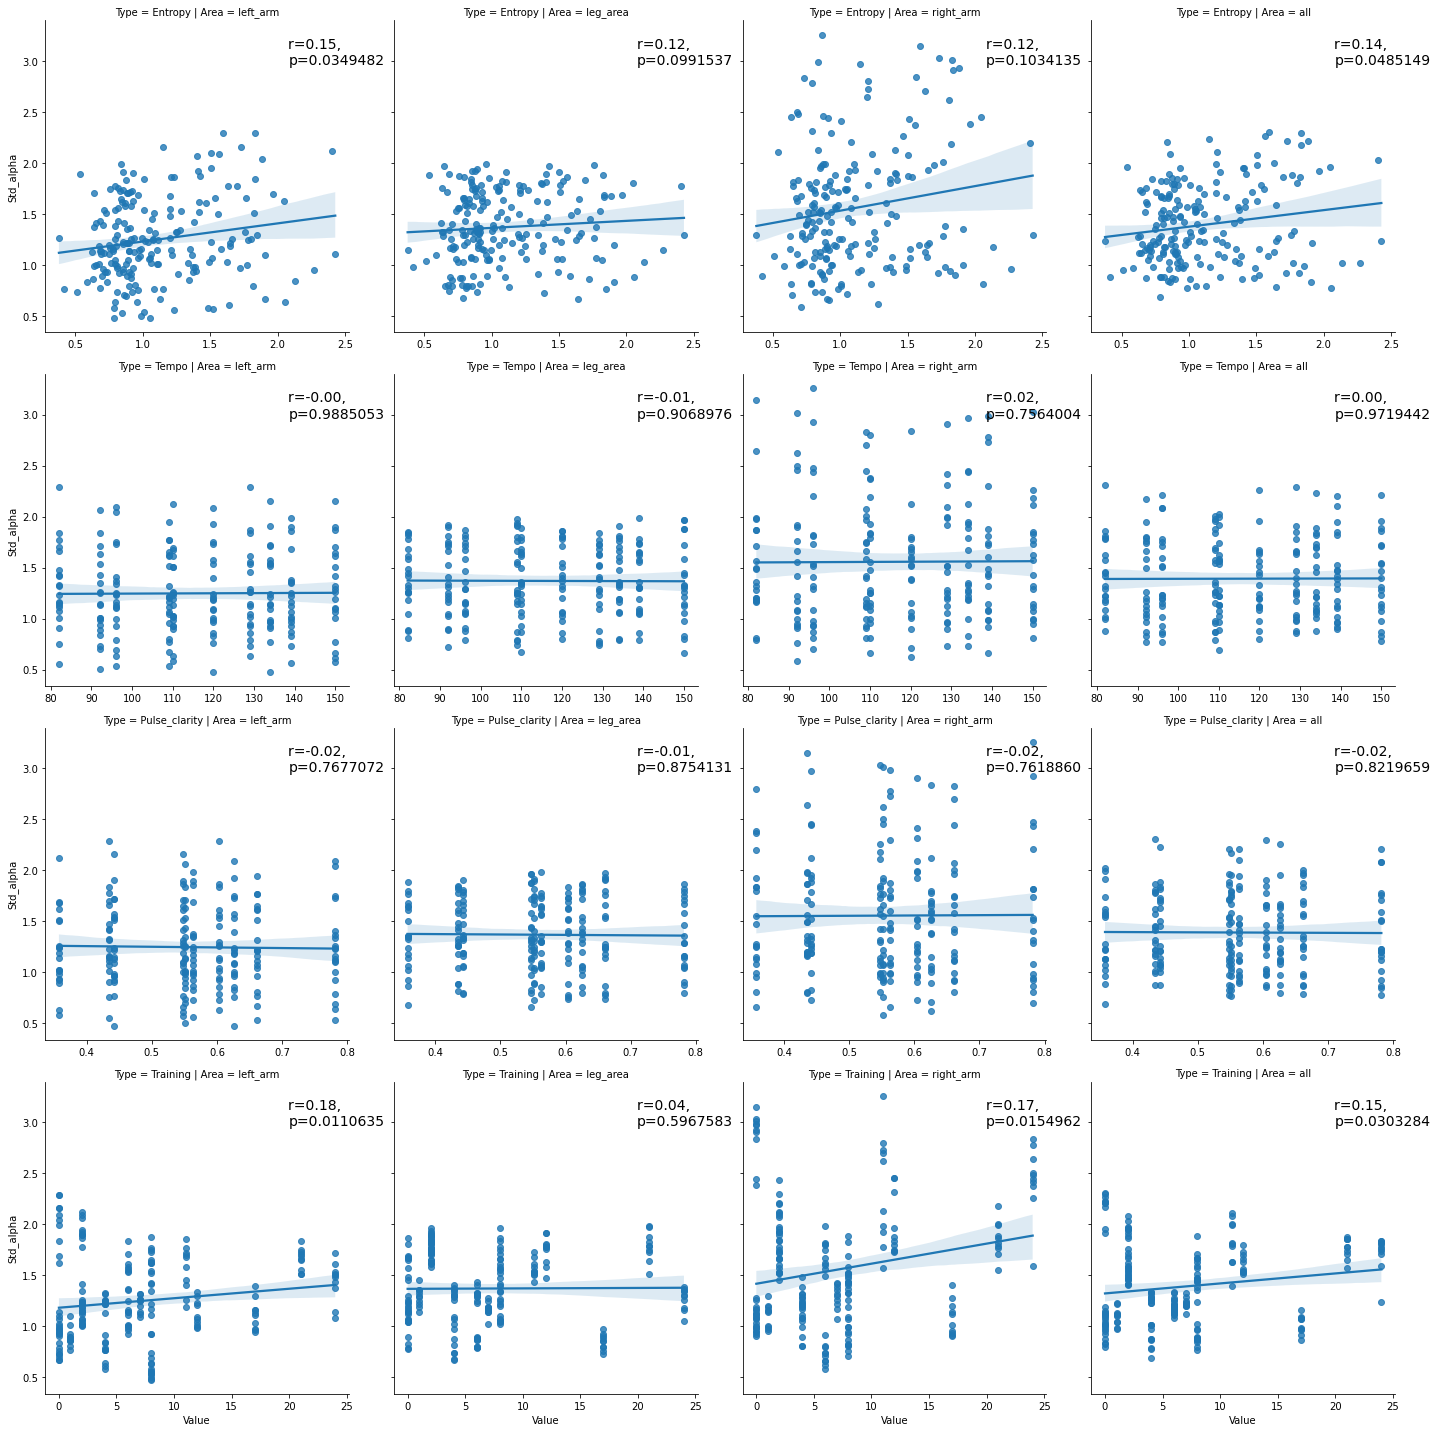

In [39]:
g = sns.lmplot(data=data_grouped, x='Value', y='Std_alpha', col='Area', row='Type', sharex=False)
g.map_dataframe(annotate, x='Value', y='Std_alpha')

### Correlaciones con z-scores

In [48]:
data_per_area_z = (
    data
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Std_alpha', 'Mean_alpha', 'Pulse_clarity', 'Training'])
    >> df.group_by('Subject', 'Area', 'Type')
    >> df.mutate(Value=(df.X.Value - df.X.Value.mean()) / df.X.Value.std())
    >> df.ungroup()
    >> df.group_by('Song', 'Subject', 'Area', 'Type')
    >> df.summarize(Value=df.X.Value.mean())
    >> df.spread('Type', 'Value')
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Pulse_clarity', 'Training'])
)
data_totals_z = (
    data
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Std_alpha', 'Mean_alpha', 'Pulse_clarity', 'Training'])
    >> df.group_by('Subject', 'Type')
    >> df.mutate(Value=(df.X.Value - df.X.Value.mean()) / df.X.Value.std())
    >> df.ungroup()
    >> df.group_by('Song', 'Subject', 'Type')
    >> df.summarize(Value=df.X.Value.mean())
    >> df.spread('Type', 'Value')
    >> df.gather('Type', 'Value', ['Entropy', 'Tempo', 'Pulse_clarity', 'Training'])
    >> df.mutate(Area='all')
)
data_grouped_z = pd.concat([data_per_area_z, data_totals_z])

/Users/march/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


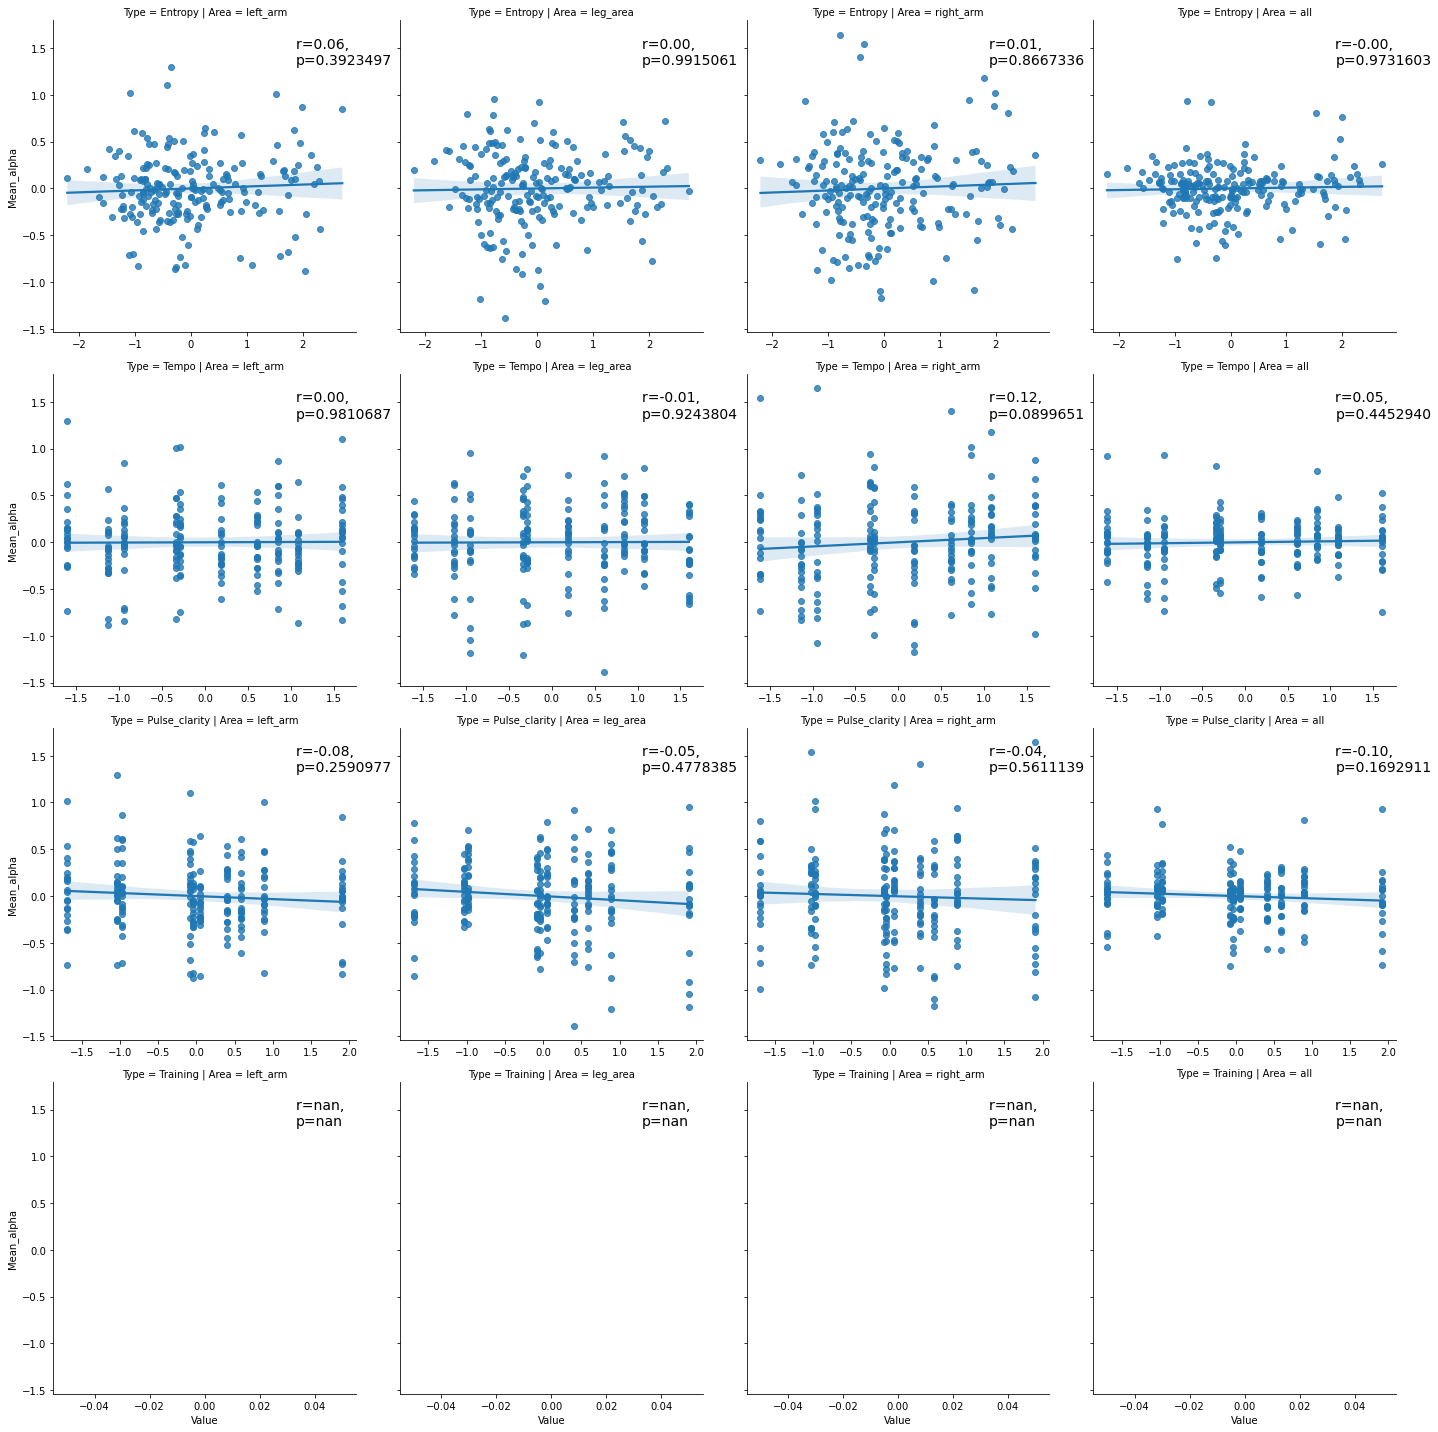

In [49]:
g = sns.lmplot(data=data_grouped_z, x='Value', y='Mean_alpha', col='Area', row='Type', sharex=False)
g.map_dataframe(annotate, x='Value', y='Mean_alpha')

/Users/march/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


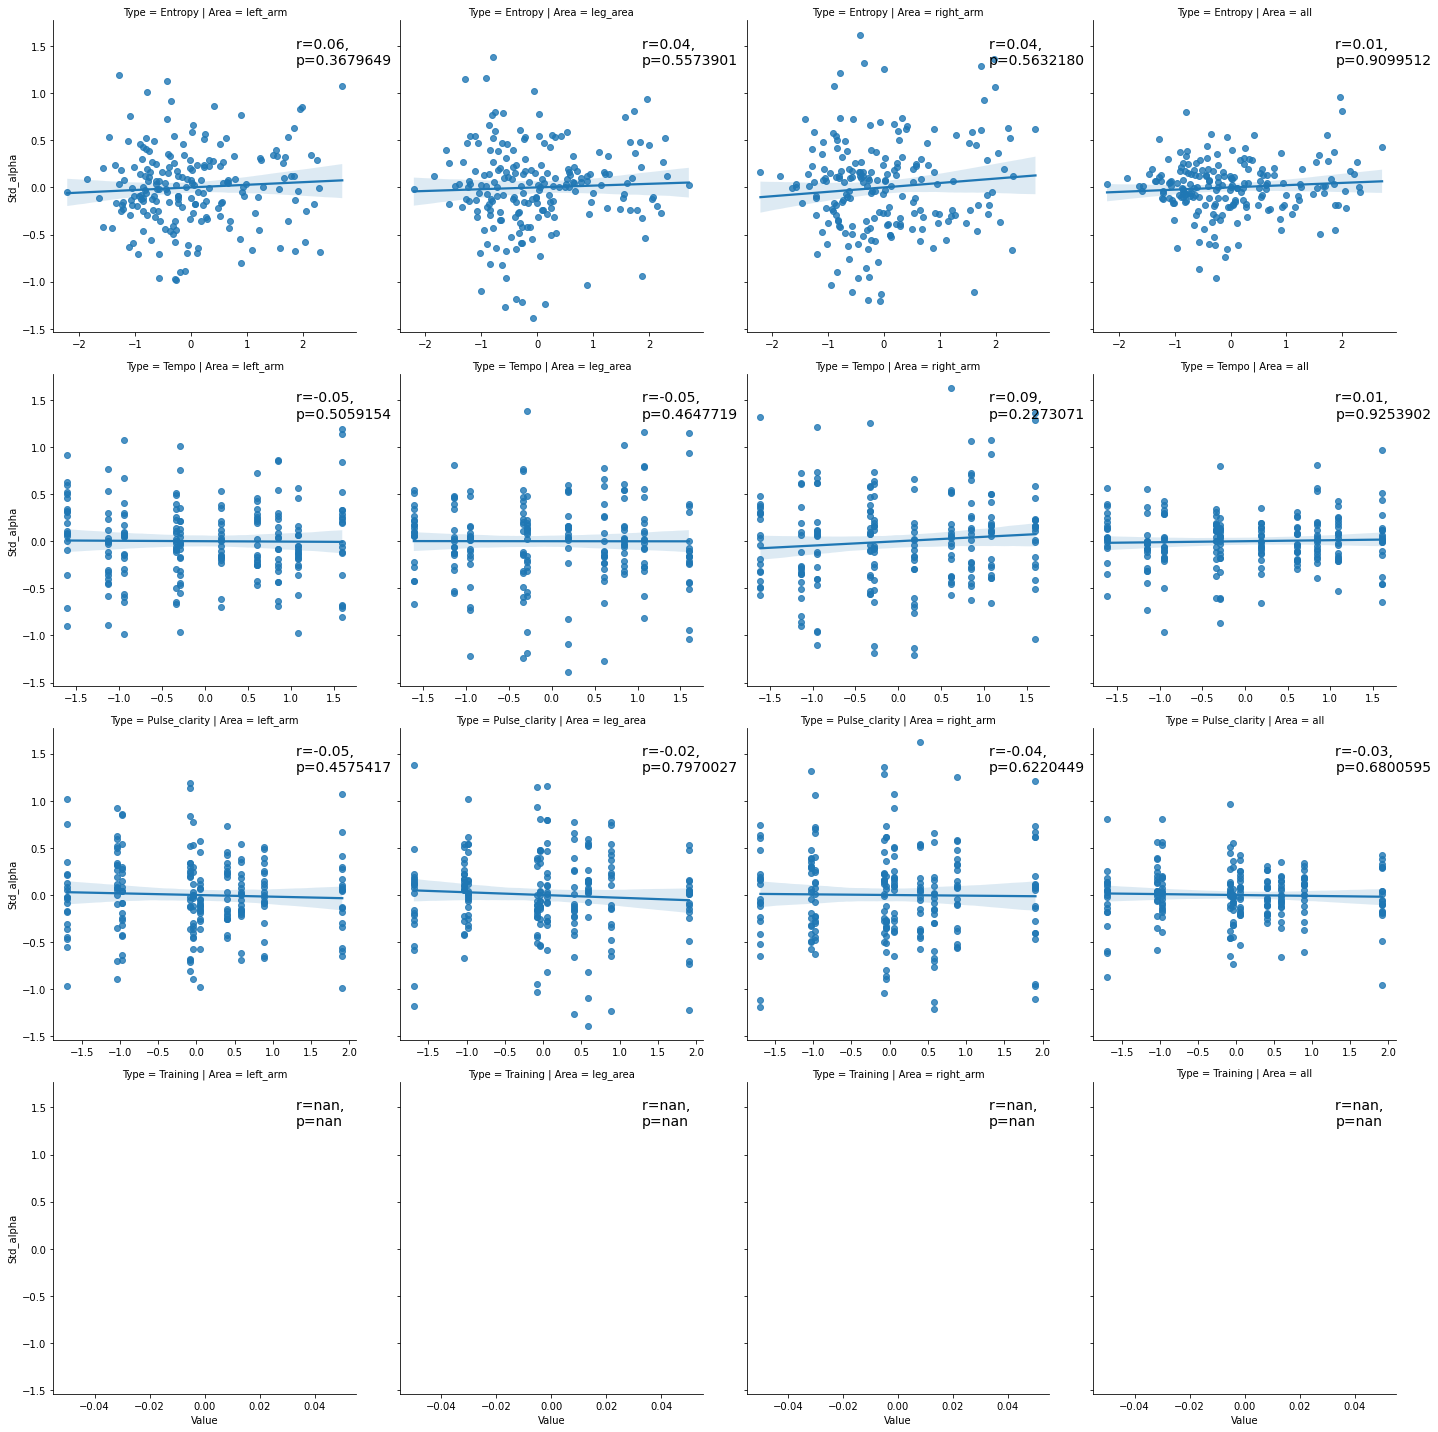

In [50]:
g = sns.lmplot(data=data_grouped_z, x='Value', y='Std_alpha', col='Area', row='Type', sharex=False)
g.map_dataframe(annotate, x='Value', y='Std_alpha')

### EEI vs. Alpha

In [98]:
data_area = pd.concat([data, data >> df.mutate(Area='all')])
eei_vs_alpha_df = (
    data_area
    >> df.gather('Type', 'Value', ['Entropy', 'Mean_alpha', 'Std_alpha', 'Training'])
    >> df.group_by('Song', 'Subject', 'Area', 'Type')
    >> df.summarize(Value=df.X.Value.mean())
    >> df.spread('Type', 'Value')
)

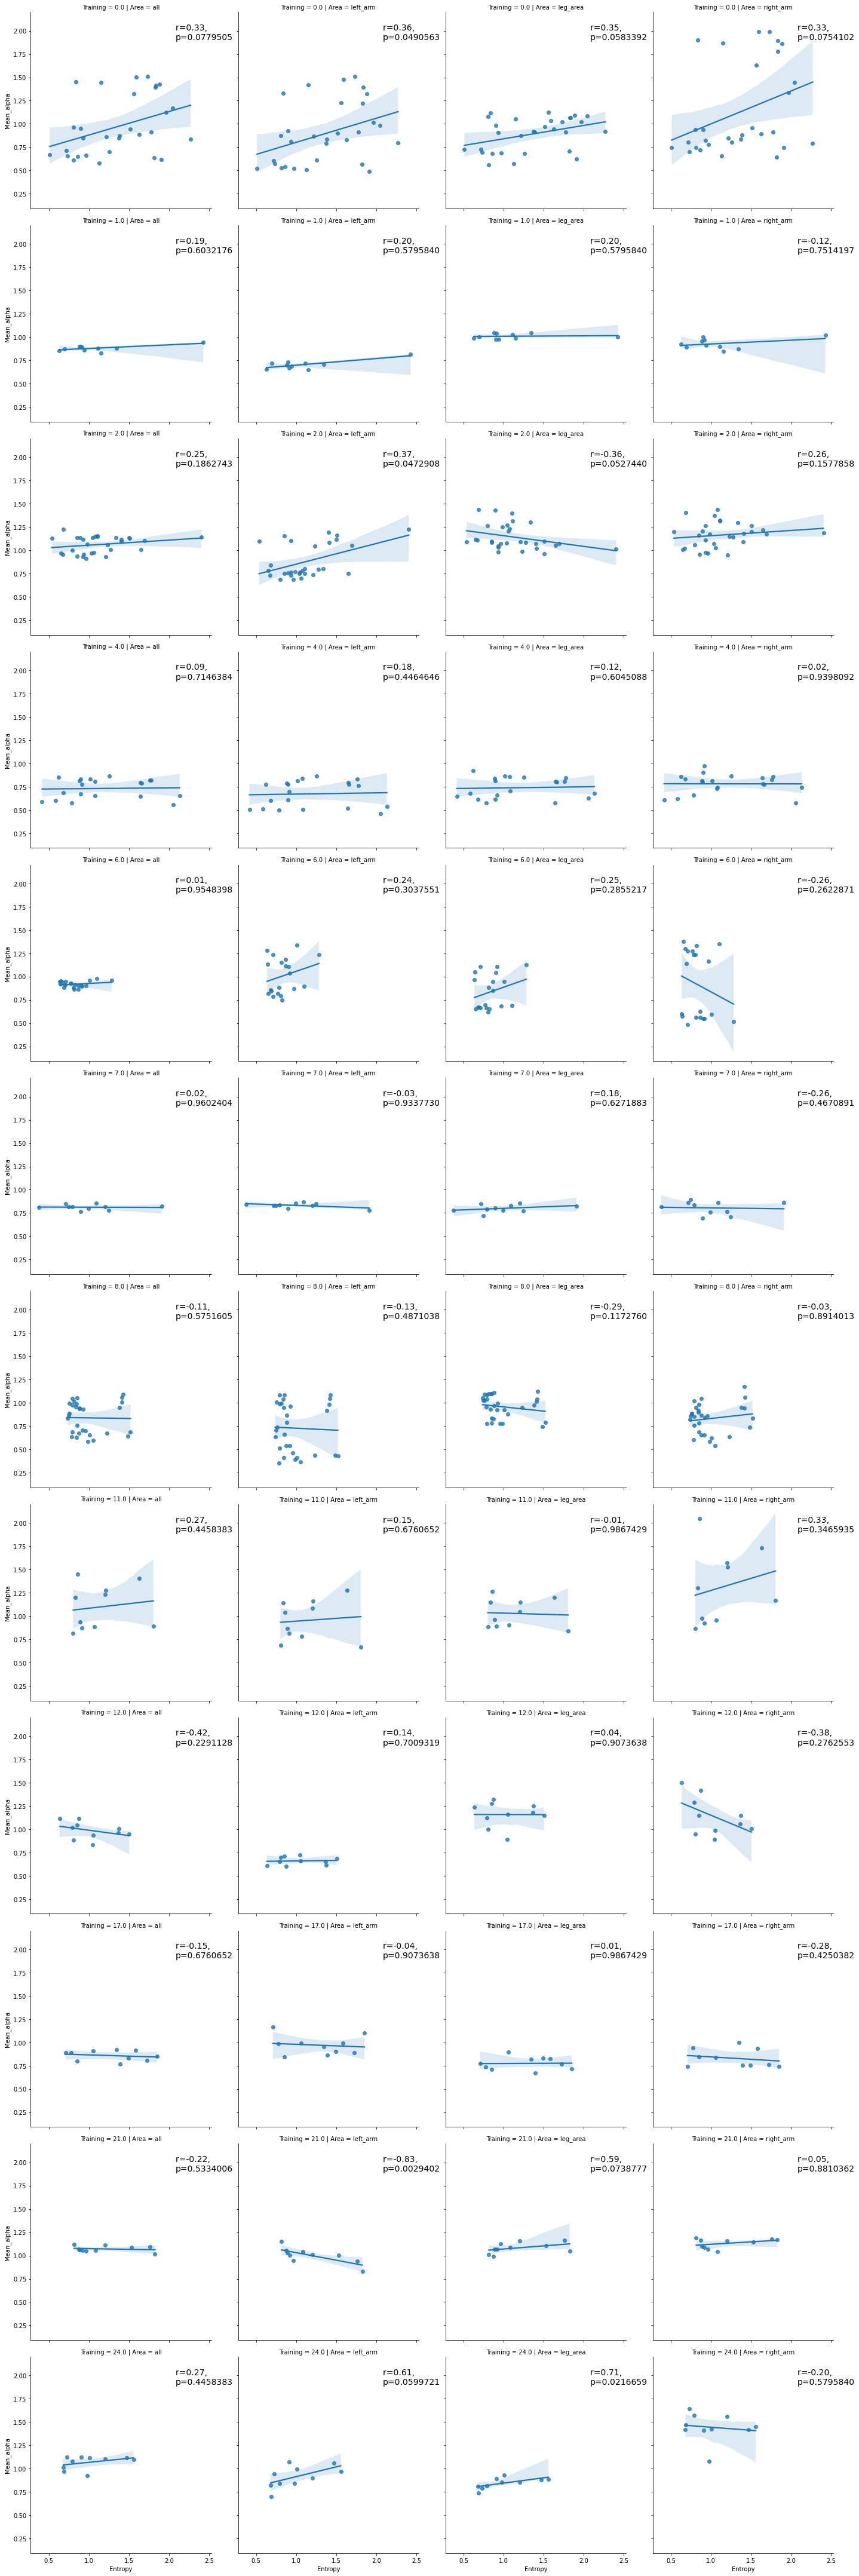

In [106]:
g = sns.lmplot(data=eei_vs_alpha_df, x='Entropy', y='Mean_alpha', col='Area', row='Training')
g.map_dataframe(annotate, x='Entropy', y='Mean_alpha')

In [102]:
training_correlations = (
    eei_vs_alpha_df
    >> df.group_by('Training', 'Area')
    >> df.summarize(c=spearmanr_sym(df.X.Entropy, df.X.Mean_alpha))
    >> df.mutate(r=df.X.c.apply(lambda x: x[0]), p=df.X.c.apply(lambda x: x[1]))
    >> df.drop('c')
)

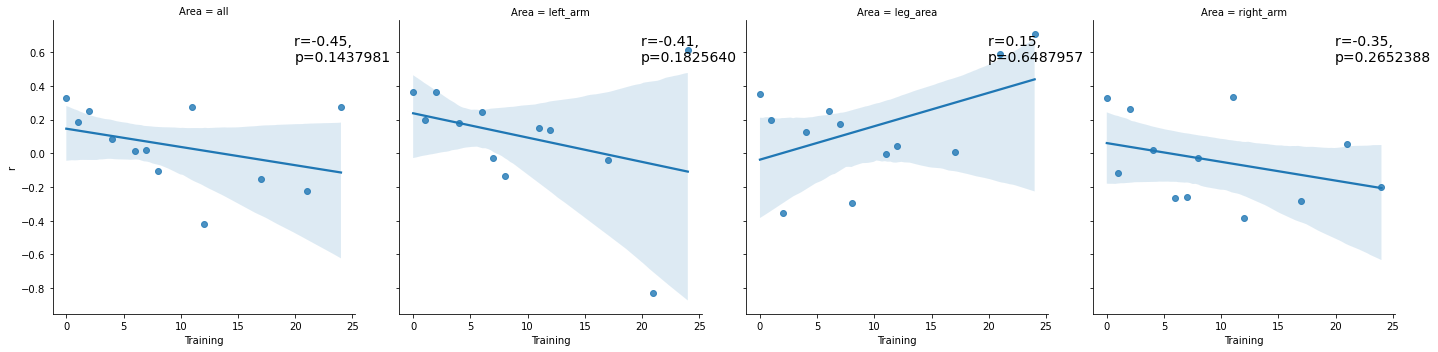

In [104]:
g = sns.lmplot(data=training_correlations, x='Training', y='r', col='Area')
g.map_dataframe(annotate, x='Training', y='r')